In [45]:
import numpy as np
import matplotlib.pyplot as plt

### Power Iteration 
[[link](http://mlwiki.org/index.php/Power_Iteration)]

In [46]:
def pwr_it(A, n):
    assert A.shape[0] == A.shape[1]
    
    vec = np.random.rand(A.shape[0])

    for i in range(n):
        vec = np.dot(A, vec)
        vec = vec / np.linalg.norm(vec)
        
    val = np.dot(A, vec)[0] / vec[0]
    vec = vec.reshape(vec.shape[0], 1)
        
    return val, vec


def pwr_it_alleig(A, n):
    assert A.shape[0] == A.shape[1]
    
    is_hermit = (A == A.T.conjugate()).all()
    if not is_hermit:
        print('Warning: Operator is not Hermitian -> Power Iteration has undefined behavior!')
    
    vals, vecs = [], []
    A = A.copy()
    for i in range(A.shape[0]):
        val, vec = pwr_it(A, n)
        vals.append(val)
        vecs.append(vec)
        A = A - val * vec * vec.T
        
    return (vals, vecs)

### PCA 
[[link](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82_(PCA)), [link2](https://habr.com/ru/post/304214/)]

In [166]:
def PCA(F, m='kaiser', n=100):
    if isinstance(m, int):
        assert m <= F.shape[1]
    
    pseudo_cov = np.dot(F.T, F)
    eig_vals, eig_vecs = pwr_it_alleig(pseudo_cov, n)
#     print(eig_vals)
    
    if m=='kaiser':
        return (eig_vals[eig_vals >= 1], eig_vecs[eig_vals >= 1])
    else:
        return (eig_vals[:m], eig_vecs[:m])

TEST

In [224]:
mean = (0, 0)
cov = [[1, 2], 
       [2, 9]]

X = np.random.multivariate_normal(mean, cov, 1000)

In [225]:
vals, vecs = PCA(X, m=2, n=1000)
list(zip(vals, vecs))

[(9716.401702325624,
  array([[0.23514841],
         [0.97195948]])),
 (544.0269822748327,
  array([[ 0.97195948],
         [-0.23514841]]))]

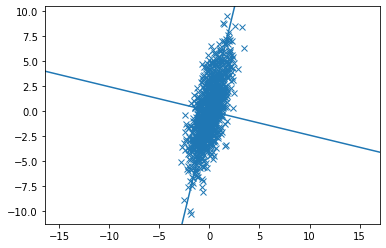

In [226]:
x, y = X.T
plt.plot(x, y, 'x')
plt.axis('equal')
for vec in vecs:
    plt.axline((0, 0), (vec[0, 0], vec[1, 0]))
plt.show()

# Graph Spectral Theory

In [2]:
import networkx as nx

### Laplacian 

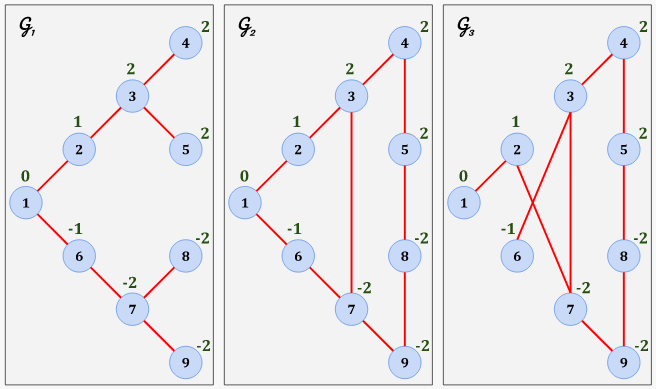

In [3]:
from IPython import display
display.Image("https://i.postimg.cc/brq7PQxL/image.png")

In [159]:
G1 = nx.Graph()
G1.add_nodes_from(range(1, 10))
G1.add_edges_from([(1, 2), (1, 6),
                   (2, 3), (6, 7),
                   (3, 4), (3, 5), (7, 8), (7, 9)])

G2 = nx.Graph()
G2.add_nodes_from(range(1, 10))
G2.add_edges_from([(1, 2), (1, 6),
                   (2, 3), (6, 7),
                   (3, 4), (3, 7), (4, 5), (7, 9), (5, 8), (8, 9)])

G3 = nx.Graph()
G3.add_nodes_from(range(1, 10))
G3.add_edges_from([(1, 2),
                   (2, 7), (6, 3),
                   (3, 4), (3, 7), (4, 5), (7, 9), (5, 8), (8, 9)])

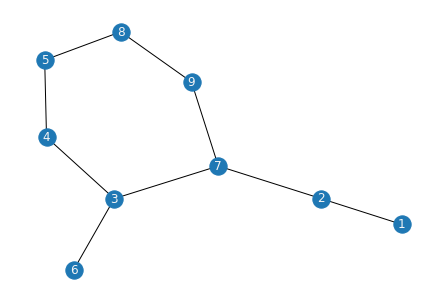

In [160]:
nx.draw(G3, with_labels=True, font_color="whitesmoke")

In [112]:
W = nx.adjacency_matrix(G1).toarray()
D = np.diag(list(zip(*list(G1.degree())))[1])
L = D - W
eig_vals, eig_vecs = np.linalg.eig(L)
U = eig_vecs

In [148]:
f = np.array([0, 1, 2, 2, 2, -1, 2, -2, -2])
f = f.reshape(f.shape[0], 1)

In [149]:
coherence = np.linalg.multi_dot([f.T, L, f])[0, 0]
coherence

44

<StemContainer object of 3 artists>

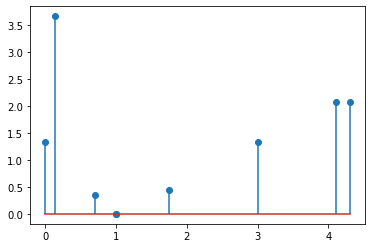

In [150]:
f_fourier = np.dot(U.T, f)
plt.stem(eig_vals, abs(f_fourier))

<StemContainer object of 3 artists>

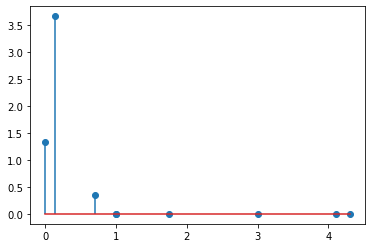

In [151]:
filter_fourier = eig_vals < 0.9 #np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0]])
filter_fourier = filter_fourier.reshape(-1, 1)
g_fourier = f_fourier * filter_fourier
plt.stem(eig_vals, abs(g_fourier))

In [152]:
g = np.dot(U, g_fourier)
g

array([[ 0.23523318],
       [ 1.00678003],
       [ 1.77610011],
       [ 2.05924384],
       [ 2.05924384],
       [-0.39044648],
       [-0.82386715],
       [-0.96114368],
       [-0.96114368]])

In [153]:
f

array([[ 0],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [-1],
       [ 2],
       [-2],
       [-2]])

array([False, False,  True,  True, False, False,  True, False, False])